In [1]:
import sys, os
path_set = False
if path_set is False:
    sys.path.append('../')
    os.chdir('../')
    path_set = True

import numpy as np
import matplotlib.pyplot as plt
from datasets import data_loader as dl

## What is the appropriate resolution?

In [2]:
dataset_codes = ['rel', 'inf', 'qdr', 'skt', 'test']
datasets = []
for code in dataset_codes:
    datasets.append(dl.load_data(code))
    
dataset_maping = dict(zip(dataset_codes, datasets))

In [3]:
def resolution_collect(code):
    res_ls = []
    dataset = dataset_maping[code]
    sampling_rate = int(len(dataset) / 10.0)
    subsampling = np.random.permutation(len(dataset))[:sampling_rate]
    for idx in subsampling:
        img_tensor, label = dataset.__getitem__(idx)
        shape = (img_tensor.size()[1], img_tensor.size()[2])
        res_ls.append(shape)
    return res_ls

In [4]:
rel_res_ls = resolution_collect('rel')
test_res_ls = resolution_collect('test')
inf_res_ls = resolution_collect('inf')
qdr_res_ls = resolution_collect('qdr')
skt_res_ls = resolution_collect('skt')

<PIL.Image.Image image mode=RGB size=308x308 at 0x7F5F31D07A58>


TypeError: an integer is required (got type NoneType)

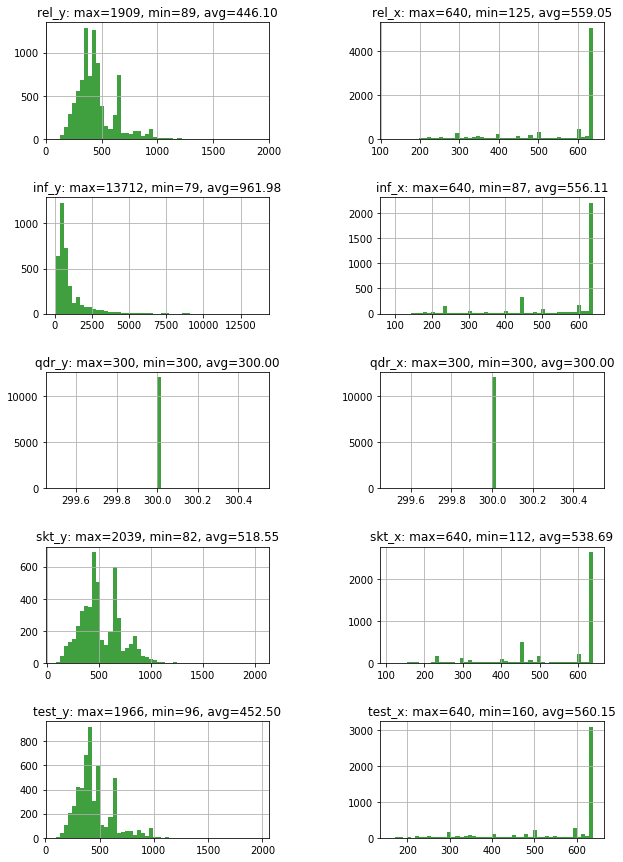

In [5]:
all_res_ls = {'rel': rel_res_ls, 'inf': inf_res_ls, 'qdr': qdr_res_ls, 'skt': skt_res_ls, 'test': test_res_ls}

fig, axs = plt.subplots(5,2, figsize=(10, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=0.5)
axs = axs.ravel()

cnt = 0
for code in dataset_codes:
    res_ls = all_res_ls[code]
    res_ls_y, res_ls_x = list(zip(*res_ls))
    
    axs[cnt].hist(res_ls_y, 50, facecolor='g', alpha=0.75)
    axs[cnt].grid(True)
    axs[cnt].set_title("{}_y: max={}, min={}, avg={:.2f}".format(code, max(res_ls_y), min(res_ls_y), sum(res_ls_y)/float(len(res_ls_y))))
    cnt += 1
    
    axs[cnt].hist(res_ls_x, 50, facecolor='g', alpha=0.75)
    axs[cnt].grid(True)
    axs[cnt].set_title("{}_x: max={}, min={}, avg={:.2f}".format(code, max(res_ls_x), min(res_ls_x), sum(res_ls_x)/float(len(res_ls_x))))
    cnt += 1

## We may choose resolution = 512x512
Then we plot some resized examples

In [6]:
import warnings
warnings.filterwarnings('ignore')
resized_datasets = []
for code in dataset_codes:
    resized_datasets.append(dl.load_data(code, resize = (512,512)))
    
resized_dataset_maping = dict(zip(dataset_codes, resized_datasets))

In [ ]:
fig, axs = plt.subplots(5,10, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=0.1)
axs = axs.ravel()
cnt = 0
for code in dataset_codes:
    ds = resized_dataset_maping[code]
    # randomly choose 10 images
    sampling = np.random.permutation(len(ds))[:10]
    axs[cnt].set_title(code)
    for idx in sampling:
        img_tensor, label = ds.__getitem__(idx)
        axs[cnt].imshow(img_tensor.permute(1, 2, 0))
        cnt += 1
        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

# The number of samples for each class

In [12]:
from torch.utils.data import DataLoader
def sample_count(data_name):
    print('Counting dataset: {}'.format(data_name))
    # import the dataset
    dataset = dl.load_data(data_name, is_train = False, resize = (224,224), class_num = 345)
    loader = DataLoader(dataset, batch_size=1,shuffle=False, num_workers=16)
    # loop over all the samples
    # find the number of samples for each class
    label_dict = dict()
    cnt = 0
    for (_, data) in enumerate(loader):
        label = int(data[1])
        if cnt % 1000 == 0:
            print(cnt)
        if label in label_dict.keys():
            label_dict[label] = label_dict[label] + 1
        else:
            label_dict[label] = 1
        cnt += 1
    return label_dict



In [4]:
real_dict = sample_count('rel')
sketch_dict = sample_count('skt')
qdr_dict = sample_count('qdr')

Counting dataset: rel
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
Counting dataset: skt
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
Counting dataset: qdr
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
Counting dataset: info


KeyError: 'info'

In [5]:
info_dict = sample_count('inf')

Counting dataset: inf
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000


In [24]:
from collections import OrderedDict
def plot_counting(label_dict, sort_by_value = True):
    if sort_by_value:
        label_dict = OrderedDict(sorted(label_dict.items(), key = lambda item: item[1]))
    # plot histogram
    label_names = label_dict.keys()
    values = label_dict.values()
    y_pos = np.arange(len(label_names))
    plt.figure(figsize=(15,7))
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, label_names)
    plt.ylabel('# of samples')
    plt.title('Distribution over class')

    plt.show()

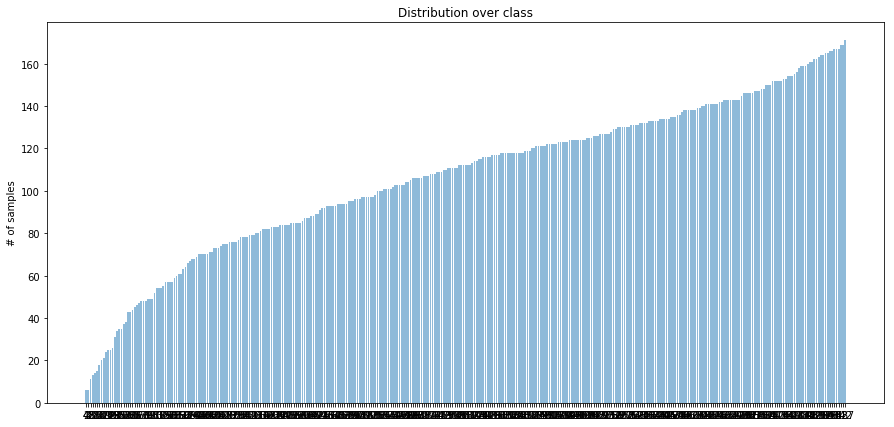

In [25]:
plot_counting(real_dict)

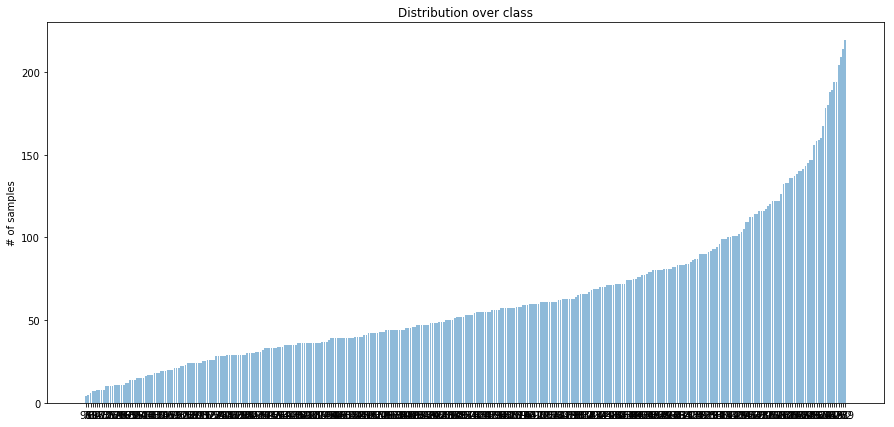

In [26]:
plot_counting(sketch_dict)

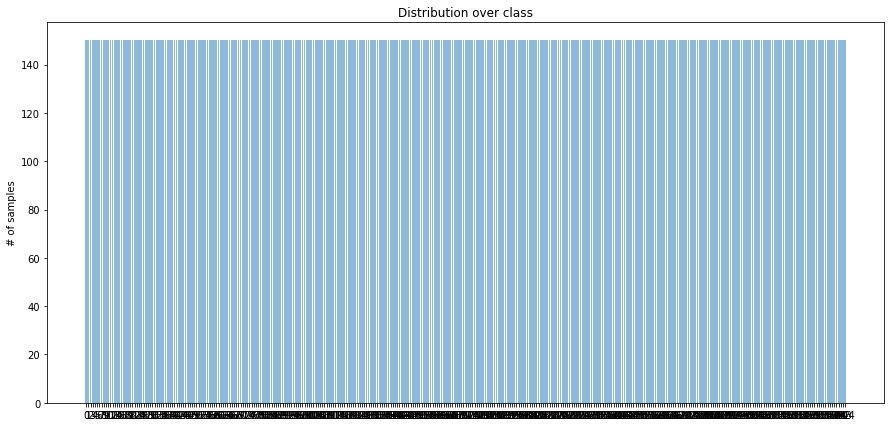

In [27]:
plot_counting(qdr_dict)

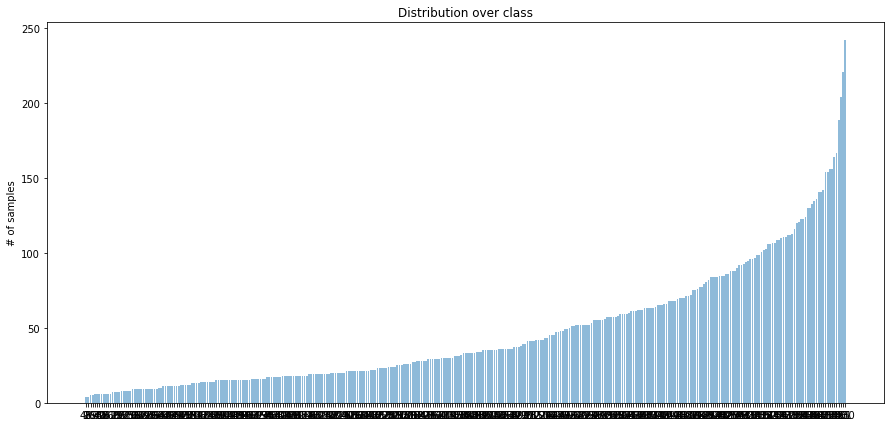

In [28]:
plot_counting(info_dict)